# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### `df5`
- The dataframe that contains the all the columns (original and featured) is `df5`.

In [2]:
df = pd.read_csv('df5.csv')

1. Check the names of all the columns by making a list because `.info()` will not show all the columns.
2. Drop all unnecessary columns.

In [3]:
list(df.columns)

['Unnamed: 0',
 'Unnamed: 0.1',
 'Grade Average 7',
 'Grade Average 8',
 'Math_7_score',
 'ELA_7_score',
 'Math_8_score',
 'ELA_8_score',
 'Absent Grade 7',
 'Tardy Grade 7',
 'Absent Grade 8',
 'Tardy Grade 8',
 'Gender',
 'target',
 'Absent Total',
 'Tardy Total',
 'Average Grade MS',
 'Average Math Score',
 'Average ELA Score',
 'Num of Above Average Comments',
 'Num of Meets Acceptable Comments',
 'Num of Incomplete Work Comments',
 'Num of Outstanding Effort Comments',
 'Num of Unprepared for Class Comments',
 'Num of Inattentive in Class Comments',
 'Num of Poor Tests Comments',
 'Num of Conscientious Comments',
 'Num of Improvement Noted Comments',
 'Num of Imcomplete Homework Comments',
 'Num of Parent Conference Requested Comments',
 'Num of Poor Class Attendance Comments',
 'Num of Excessive Lateness Comments',
 'Comments',
 "('ability',)",
 "('about',)",
 "('above',)",
 "('absences',)",
 "('absent',)",
 "('academic',)",
 "('acceptable',)",
 "('according',)",
 "('accumulated'

In [4]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [5]:
list(df.columns)

['Grade Average 7',
 'Grade Average 8',
 'Math_7_score',
 'ELA_7_score',
 'Math_8_score',
 'ELA_8_score',
 'Absent Grade 7',
 'Tardy Grade 7',
 'Absent Grade 8',
 'Tardy Grade 8',
 'Gender',
 'target',
 'Absent Total',
 'Tardy Total',
 'Average Grade MS',
 'Average Math Score',
 'Average ELA Score',
 'Num of Above Average Comments',
 'Num of Meets Acceptable Comments',
 'Num of Incomplete Work Comments',
 'Num of Outstanding Effort Comments',
 'Num of Unprepared for Class Comments',
 'Num of Inattentive in Class Comments',
 'Num of Poor Tests Comments',
 'Num of Conscientious Comments',
 'Num of Improvement Noted Comments',
 'Num of Imcomplete Homework Comments',
 'Num of Parent Conference Requested Comments',
 'Num of Poor Class Attendance Comments',
 'Num of Excessive Lateness Comments',
 'Comments',
 "('ability',)",
 "('about',)",
 "('above',)",
 "('absences',)",
 "('absent',)",
 "('academic',)",
 "('acceptable',)",
 "('according',)",
 "('accumulated',)",
 "('add',)",
 "('advantage'

#### Encode columns:
- Encode categorical column, `Gender`, in order to clean and normalize the raw dataset.

In [6]:
df['Gender'] = df['Gender'].map({"'M'": 0, "'F'": 1})

In [7]:
df['Gender']

0      0
1      0
2      1
3      0
4      1
      ..
881    1
882    0
883    0
884    0
885    1
Name: Gender, Length: 886, dtype: int64

#### New `df`:
- Create a new `df` in that drops the `Comments` columns for all continuous columns.

In [8]:
df1 = df.drop('Comments', axis=1)

# Import all the libraries needed for modeling

In [9]:
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from IPython.display import Image
from pydotplus import graph_from_dot_data

from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, IsolationForest

from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# All columns

**Splitting the data:**
1. Separate the data into it's features (X) and the the target (y).
2. Create training and test sets.
    - test_size = .20 is a fair split where 80% of the data is training the set and 20% is the testing set.
    - Use a random_state = 6 to get the same result if trying this project out.
3. Since there was an imbalance between the classes, the method SMOTE can be used to help with the imbalance.
    - SMOTE stands for Synthetic Minority Oversampling. Rather then oversampling the minority class with replacement (which simply adds duplicate cases to the dataset), the algorithm generates new sample data by creating 'synthetic' examples that are combinations of the closest minority class cases.
4. Normalize the data by using StandardScaler to make sure that all of the data is represented in the same scale.
5. Convert the train data into a DataFrame to view the scaled data - notice how the scaler also scaled the encoded columns, this does not have a negative effect on the model, because each value has been replaced with a corresponding decimal value, but it still only contains those 3 or 4 values. The overall information content of each column has not changed.

#### Train-Test-Split

In [10]:
X = df1.drop('target', axis=1)
y = df1.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 6)

#### Using SMOTE

In [12]:
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts())

Original class distribution: 

0    668
1    218
Name: target, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1    526
0    526
dtype: int64


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#### Standardize the Data

In [13]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train_resampled)
scaled_X_test = scaler.transform(X_test)

#### Dataframe of standarized Data

In [14]:
scaled_df_train = pd.DataFrame(scaled_X_train, columns=X_train.columns)
scaled_df_train.head()

,Grade Average 7,Grade Average 8,Math_7_score,ELA_7_score,Math_8_score,ELA_8_score,Absent Grade 7,Tardy Grade 7,Absent Grade 8,Tardy Grade 8,...,"('will',)","('with',)","('wonderful',)","('work',)","('working',)","('worth',)","('writing',)","('yet',)","('you',)","('zero',)"
0,0.001614,-1.129618,-1.292183,-0.802198,-1.948802,-2.032273,1.623555,0.556271,-0.135577,1.069954,...,-0.050246,-0.054323,-0.057094,-2.427949,-0.053059,-0.030846,-0.030846,0.0,-0.10875,0.0
1,0.218160,0.063685,-0.593857,-1.392174,-0.006684,-1.432481,-0.663278,-0.234726,0.840150,-0.386164,...,-0.050246,-0.054323,-0.057094,-0.211837,-0.053059,-0.030846,-0.030846,0.0,-0.10875,0.0
2,-2.524766,-3.104740,-1.990508,-1.982150,-1.948802,-2.032273,-0.853847,-0.432475,-0.916158,-0.677387,...,-0.050246,-0.054323,-0.057094,0.150799,-0.053059,-0.030846,-0.030846,0.0,-0.10875,0.0
3,0.398616,0.434021,0.802793,0.377755,0.640688,0.366895,-0.663278,-0.432475,-0.916158,-0.531775,...,-0.050246,-0.054323,-0.057094,1.663334,-0.053059,-0.030846,-0.030846,0.0,-0.10875,0.0
4,0.398616,0.228279,0.104468,0.377755,0.640688,-0.232897,2.576403,-0.432475,2.206167,-0.094940,...,-0.050246,-0.054323,-0.057094,0.737925,-0.053059,-0.030846,-0.030846,0.0,-0.10875,0.0


# Comparing Models

#### Pipelines
1. LogisticRegression
2. KNN (K-Nearest Neighbors)
3. Adaboost (Adapative Boosting)
4. Decision Tree
5. Random Forest

In [15]:
pipe_log = Pipeline([('clf', LogisticRegression(random_state=6))])
pipe_knn = Pipeline([('clf', KNeighborsClassifier())])
pipe_ada = Pipeline([('clf', AdaBoostClassifier(random_state=6))])
pipe_decision = Pipeline([('clf', DecisionTreeClassifier(random_state = 6))])
pipe_random = Pipeline([('clf', RandomForestClassifier(random_state = 6))])

pipelines = [pipe_log, pipe_knn, pipe_ada, pipe_decision, pipe_random]
pipeline_names = ['LogisticRegression', 'KNeigbhors','AdaBoost','DecisionTree','RandomForest']

for pipe in pipelines:
    print(pipe)
    pipe.fit(scaled_X_train, y_train_resampled)

scores_df = pd.DataFrame()
scores = []
for index, val in enumerate(pipelines):
    s = val.score(scaled_X_test, y_test)
    scores.append(s)
    print('%s pipeline test accuracy: %.3f' % (pipeline_names[index], val.score(scaled_X_test, y_test)))

Pipeline(memory=None,
         steps=[('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=6,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)
Pipeline(memory=None,
         steps=[('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)
Pipeline(memory=None,
         steps=[('clf',
                 AdaBoostClassifier(algorithm='SAMME

- Save the scores it's in own dataframe for comparison.

In [16]:
scores_df['Model1'] = pipeline_names
scores_df['Test Accuracy Score'] = scores
scores_df.sort_values(by='Test Accuracy Score',ascending=False)

,Model1,Test Accuracy Score
0,LogisticRegression,0.910112
2,AdaBoost,0.893258
4,RandomForest,0.887640
3,DecisionTree,0.848315
1,KNeigbhors,0.814607


#### Isolation Forest
- The Isolation Forest Algorithm returns the anomaly score of each sample using the IsolationForest algorithm. The IsolationForest isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.  Isolation Forest explicitly identifies anomalies instead of profiling normal data points. Isolation Forest, like any tree ensemble method, is built on the basis of decision trees.

Help with Isolation Forest: https://github.com/erykml/isolation_forest_example/blob/master/isolation_forest_example.ipynb

In [17]:
isolation_clf = IsolationForest(max_samples=100, contamination = 0.1, random_state=6)
isolation_clf.fit(X_train)

y_pred_train = isolation_clf.predict(X_train)
y_pred_test = isolation_clf.predict(X_test)

In [18]:
print("Accuracy:", list(y_pred_test).count(1)/y_pred_test.shape[0])

Accuracy: 0.8595505617977528


In [19]:
iso_acc = list(y_pred_test).count(1)/y_pred_test.shape[0]

In [20]:
isolation_df = pd.DataFrame()
isolation_df['Model1'] = ['IsolationForest']
isolation_df['Test Accuracy Score'] = [iso_acc]

In [21]:
isolation_df

,Model1,Test Accuracy Score
0,IsolationForest,0.859551


- Add the new score to the existing dataframe

In [22]:
scores_df = pd.concat([scores_df, isolation_df]).sort_values(by='Test Accuracy Score',ascending=False)

In [23]:
scores_df

,Model1,Test Accuracy Score
0,LogisticRegression,0.910112
2,AdaBoost,0.893258
4,RandomForest,0.887640
0,IsolationForest,0.859551
3,DecisionTree,0.848315
1,KNeigbhors,0.814607


#### GradientBoost

In [24]:
gbt_clf = GradientBoostingClassifier(random_state = 6)
gbt_clf.fit(scaled_X_train, y_train_resampled)
gbt_preds = gbt_clf.predict(scaled_X_test)

In [25]:
gbt_acc = accuracy_score(y_test, gbt_preds)

In [26]:
gbt_df = pd.DataFrame()
gbt_df['Model1'] = ['GradientBoost']
gbt_df['Test Accuracy Score'] = [gbt_acc]

#### XGBoost

In [27]:
xgboost_clf = XGBClassifier(random_state = 6)
xgboost_clf.fit(scaled_X_train, y_train_resampled)
xgboost_preds = xgboost_clf.predict(scaled_X_test)

In [28]:
xgboost_acc = accuracy_score(y_test, xgboost_preds)

In [29]:
xgboost_df = pd.DataFrame()
xgboost_df['Model1'] = ['XGBoost']
xgboost_df['Test Accuracy Score'] = [xgboost_acc]

- Final dataframe comparing all scores.
    - This shows the top three models, `LogisticRegression` `GradientBoost`, `RandomForest`, with accuracy scores between 89% and 91%.

In [30]:
scores_df = pd.concat([scores_df, gbt_df, xgboost_df]).sort_values(by='Test Accuracy Score',ascending=False)

In [31]:
scores_df

,Model1,Test Accuracy Score
0,LogisticRegression,0.910112
0,GradientBoost,0.910112
0,XGBoost,0.904494
2,AdaBoost,0.893258
4,RandomForest,0.887640
0,IsolationForest,0.859551
3,DecisionTree,0.848315
1,KNeigbhors,0.814607


# Dimensionality Reduction using PCA

- PCA is principal component analysis -- cut down data with high number of features

#### Train-Test_Split
- Separate the target from the rest of the data. (`X` are the features and `y` is the target)

In [32]:
X_new = df1.drop('target', axis=1)
y_new = df1.target

#### Scaling
- Fit a PCA object and plot to see what number to reduce the features by.
    - Before anything, the numbers need to be scaled otherwise it will be off.
    - Note: Use the number before it starts to level off, keep the explained variance between 75% and 80%

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_new)
X_scaled = scaler.transform(X_new)

#### Find the number of components

**What does the graph show?**
- Looking at the cut off of 80% explained variance, the best number of components to have for the dataset is 38, to avoid the curse of dimensionality.

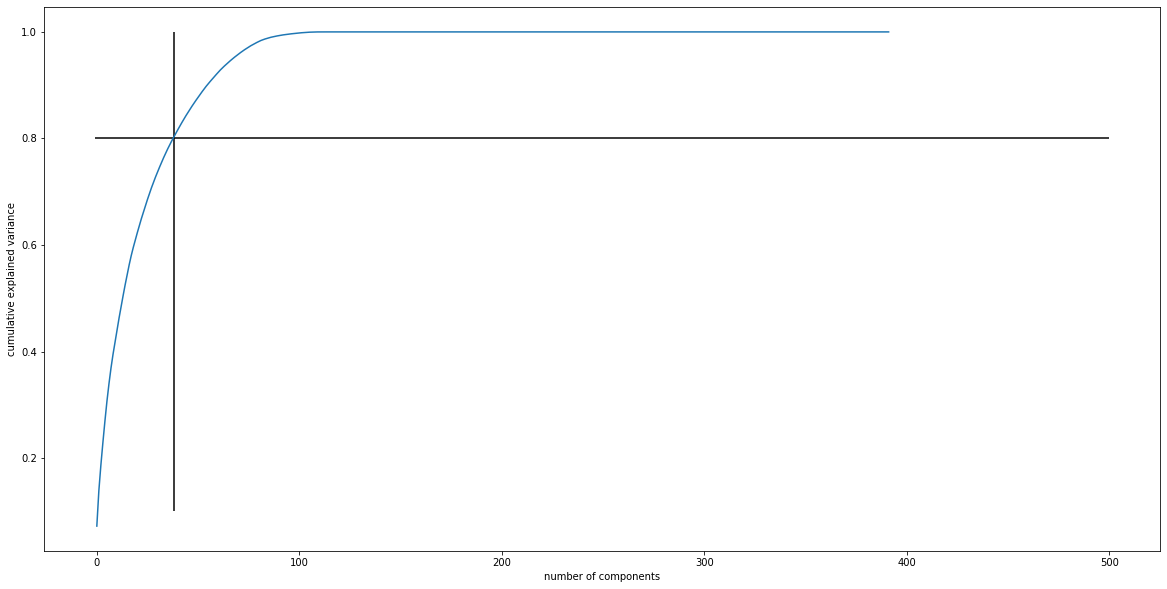

In [34]:
from sklearn.decomposition import PCA
plt.figure(figsize=(20,10))

pca = PCA().fit(X_scaled) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.hlines(.8,-1,500)
plt.vlines(38, 0.1, 1.00)
plt.show();

# Comparing Models with PCA

#### Pipelines with n_components = 38
1. LogisticRegression
2. KNN (K-Nearest Neighbors)
3. Adaboost (Adapative Boosting)
4. Decision Tree
5. Random Forest

In [35]:
pipe_log_new = Pipeline([('pca', PCA(n_components=38)), ('clf', LogisticRegression(random_state=6))])
pipe_knn_new = Pipeline([('pca', PCA(n_components=38)), ('clf', KNeighborsClassifier())])
pipe_ada_new = Pipeline([('pca', PCA(n_components=38)), ('clf', AdaBoostClassifier(random_state=6))])
pipe_decision_new = Pipeline([('pca', PCA(n_components=38)), ('clf', DecisionTreeClassifier(random_state = 6))])
pipe_random_new = Pipeline([('pca', PCA(n_components=38)), ('clf', RandomForestClassifier(random_state = 6))])

pipelines = [pipe_log_new, pipe_knn_new, pipe_ada_new, pipe_decision_new, pipe_random_new]
pipeline_names = ['LogisticRegression', 'KNeigbhors','AdaBoost','DecisionTree','RandomForest']

for pipe in pipelines:
    print(pipe)
    pipe.fit(scaled_X_train, y_train_resampled)

scores_df_new = pd.DataFrame()
scores = []
for index, val in enumerate(pipelines):
    s = val.score(scaled_X_test, y_test)
    scores.append(s)
    print('%s pipeline test accuracy: %.3f' % (pipeline_names[index], val.score(scaled_X_test, y_test)))

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=38,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=6,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)
Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=38,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',

- Create a new dataframe with the pca scores

In [36]:
scores_df_new['Model2'] = pipeline_names
scores_df_new['PCA Test Accuracy Score'] = scores
scores_df_new.sort_values(by='PCA Test Accuracy Score',ascending=False)

,Model2,PCA Test Accuracy Score
4,RandomForest,0.904494
0,LogisticRegression,0.876404
1,KNeigbhors,0.865169
2,AdaBoost,0.842697
3,DecisionTree,0.825843


#### Gradient Boost: PCA(n_components=38) 

In [37]:
pca_gbt = PCA(n_components=38) 
pca_gbt.fit(X)

PCA(copy=True, iterated_power='auto', n_components=38, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [38]:
X_train_pca_gbt = pca_gbt.transform(X_train)
X_test_pca_gbt = pca_gbt.transform(X_test)
pca_gbt_clf = GradientBoostingClassifier(random_state = 6).fit(X_train_pca_gbt,y_train)

print('PC Accuracy: ', accuracy_score(y_test, pca_gbt_clf.predict(X_test_pca_gbt)))

PC Accuracy:  0.8764044943820225


In [39]:
pca_gbt_acc = accuracy_score(y_test, pca_gbt_clf.predict(X_test_pca_gbt))

- Create dataframe to keep track of scores

In [40]:
gbt_df_new = pd.DataFrame()
gbt_df_new['Model2'] = ['GradientBoost']
gbt_df_new['PCA Test Accuracy Score'] = [pca_gbt_acc]

#### XGBOOST: PCA(n_components=38) 

In [41]:
pca_xgb = PCA(n_components=38) 
pca_xgb.fit(X)

PCA(copy=True, iterated_power='auto', n_components=38, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [42]:
X_train_pca_xgb = pca_xgb.transform(X_train)
X_test_pca_xgb = pca_xgb.transform(X_test)
pca_xgb_clf = XGBClassifier(random_state = 6).fit(X_train_pca_xgb,y_train)

print('PC Accuracy: ', accuracy_score(y_test, pca_xgb_clf.predict(X_test_pca_xgb)))

PC Accuracy:  0.8876404494382022


In [43]:
pca_xgb_acc = accuracy_score(y_test, pca_xgb_clf.predict(X_test_pca_xgb))

In [44]:
xgb_df_new = pd.DataFrame()
xgb_df_new['Model2'] = ['XGBoost']
xgb_df_new['PCA Test Accuracy Score'] = [pca_xgb_acc]

- Combine the dataframes

In [45]:
scores_df_new = pd.concat([scores_df_new, gbt_df_new, xgb_df_new]).sort_values(by='PCA Test Accuracy Score',ascending=False)

In [46]:
scores_df_new

,Model2,PCA Test Accuracy Score
4,RandomForest,0.904494
0,XGBoost,0.887640
0,LogisticRegression,0.876404
0,GradientBoost,0.876404
1,KNeigbhors,0.865169
2,AdaBoost,0.842697
3,DecisionTree,0.825843


#### IsolationForest: PCA(n_components=38)

In [47]:
pca_iso = PCA(n_components=38) 
pca_iso.fit(X)

PCA(copy=True, iterated_power='auto', n_components=38, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [48]:
X_train_pca_iso = pca_iso.transform(X_train)
X_test_pca_iso = pca_iso.transform(X_test)
pca_iso_clf = IsolationForest(max_samples=100, contamination = 0.1, random_state=6).fit(X_train_pca_iso,y_train)

y_pred_train_iso = pca_iso_clf.predict(X_train_pca_iso)
y_pred_test_iso = pca_iso_clf.predict(X_test_pca_iso)

In [49]:
print("Accuracy:", list(y_pred_test_iso).count(1)/y_pred_test_iso.shape[0])

Accuracy: 0.8539325842696629


In [50]:
pca_iso_acc = list(y_pred_test_iso).count(1)/y_pred_test_iso.shape[0]

In [51]:
isolation_df_new = pd.DataFrame()
isolation_df_new['Model2'] = ['IsolationForest']
isolation_df_new['PCA Test Accuracy Score'] = [pca_iso_acc]

# Fixing the Dataframes for all models and their scores

In [52]:
scores_df_new = pd.concat([scores_df_new, isolation_df_new]).sort_values(by='PCA Test Accuracy Score',ascending=False)

In [53]:
scores_df_new

,Model2,PCA Test Accuracy Score
4,RandomForest,0.904494
0,XGBoost,0.887640
0,LogisticRegression,0.876404
0,GradientBoost,0.876404
1,KNeigbhors,0.865169
0,IsolationForest,0.853933
2,AdaBoost,0.842697
3,DecisionTree,0.825843


In [54]:
scores_df_ = scores_df.sort_values(by='Model1')

In [55]:
scores_df_new_ = scores_df_new.sort_values(by='Model2')

In [56]:
scores = pd.concat([scores_df_, scores_df_new_], axis=1)

In [57]:
scores

,Model1,Test Accuracy Score,Model2,PCA Test Accuracy Score
2,AdaBoost,0.893258,AdaBoost,0.842697
3,DecisionTree,0.848315,DecisionTree,0.825843
0,GradientBoost,0.910112,GradientBoost,0.876404
0,IsolationForest,0.859551,IsolationForest,0.853933
1,KNeigbhors,0.814607,KNeigbhors,0.865169
0,LogisticRegression,0.910112,LogisticRegression,0.876404
4,RandomForest,0.887640,RandomForest,0.904494
0,XGBoost,0.904494,XGBoost,0.887640


In [58]:
scores = scores.drop('Model2', axis=1)

In [59]:
scores.sort_values(by='Test Accuracy Score',ascending=False)

,Model1,Test Accuracy Score,PCA Test Accuracy Score
0,GradientBoost,0.910112,0.876404
0,LogisticRegression,0.910112,0.876404
0,XGBoost,0.904494,0.887640
2,AdaBoost,0.893258,0.842697
4,RandomForest,0.887640,0.904494
0,IsolationForest,0.859551,0.853933
3,DecisionTree,0.848315,0.825843
1,KNeigbhors,0.814607,0.865169


# Hyperparameter Tuning the top 3 performing models

Using GridSearchCV to help find the best hyperparameters for the final model to help increase the accuracy score: `LogisticRegression`, `GradientBoost`, and `XGBoost`.
- Check the `.get_params().keys()` to see what can be passed in the gridsearch.
    - Use the classifier and tab-shift to see what can be passed in.
- Find the best accuracy score with the new parameters.

#### LogisticRegression

In [60]:
pipe_log.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'clf', 'clf__C', 'clf__class_weight', 'clf__dual', 'clf__fit_intercept', 'clf__intercept_scaling', 'clf__l1_ratio', 'clf__max_iter', 'clf__multi_class', 'clf__n_jobs', 'clf__penalty', 'clf__random_state', 'clf__solver', 'clf__tol', 'clf__verbose', 'clf__warm_start'])

In [61]:
pipe_log = Pipeline([('clf', LogisticRegression(random_state=6))])


param_grid_log = [ 
  {'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
   'clf__penalty': ['11', '12', 'elasticnet', 'none'],
   'clf__multi_class': ['auto', 'ovr', 'multinomial'],
  }
]


gs_log = GridSearchCV(estimator=pipe_log,
            param_grid=param_grid_log,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)


gs_log.fit(scaled_X_train, y_train_resampled)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] clf__multi_class=auto, clf__penalty=11, clf__solver=newton-cg ...
[CV]  clf__multi_class=auto, clf__penalty=11, clf__solver=newton-cg, total=   0.0s
[CV] clf__multi_class=auto, clf__penalty=11, clf__solver=newton-cg ...
[CV]  clf__multi_class=auto, clf__penalty=11, clf__solver=newton-cg, total=   0.0s
[CV] clf__multi_class=auto, clf__penalty=11, clf__solver=newton-cg ...
[CV]  clf__multi_class=auto, clf__penalty=11, clf__solver=newton-cg, total=   0.0s
[CV] clf__multi_class=auto, clf__penalty=11, clf__solver=lbfgs .......
[CV]  clf__multi_class=auto, clf__penalty=11, clf__solver=lbfgs, total=   0.0s
[CV] clf__multi_class=auto, clf__penalty=11, clf__solver=lbfgs .......
[CV]  clf__multi_class=auto, clf__penalty=11, clf__solver=lbfgs, total=   0.0s
[CV] clf__multi_class=auto, clf__penalty=11, clf__solver=lbfgs .......
[CV]  clf__multi_class=auto, clf__penalty=11, clf__solver=lbfgs, total=   0.0s
[CV] clf__multi_class=auto

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimat

[CV]  clf__multi_class=auto, clf__penalty=none, clf__solver=newton-cg, total=   1.0s
[CV] clf__multi_class=auto, clf__penalty=none, clf__solver=newton-cg .
[CV]  clf__multi_class=auto, clf__penalty=none, clf__solver=newton-cg, total=   0.4s
[CV] clf__multi_class=auto, clf__penalty=none, clf__solver=newton-cg .
[CV]  clf__multi_class=auto, clf__penalty=none, clf__solver=newton-cg, total=   0.5s
[CV] clf__multi_class=auto, clf__penalty=none, clf__solver=lbfgs .....
[CV]  clf__multi_class=auto, clf__penalty=none, clf__solver=lbfgs, total=   0.1s
[CV] clf__multi_class=auto, clf__penalty=none, clf__solver=lbfgs .....
[CV]  clf__multi_class=auto, clf__penalty=none, clf__solver=lbfgs, total=   0.0s
[CV] clf__multi_class=auto, clf__penalty=none, clf__solver=lbfgs .....
[CV]  clf__multi_class=auto, clf__penalty=none, clf__solver=lbfgs, total=   0.0s
[CV] clf__multi_class=auto, clf__penalty=none, clf__solver=liblinear .
[CV]  clf__multi_class=auto, clf__penalty=none, clf__solver=liblinear, total

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  clf__multi_class=auto, clf__penalty=none, clf__solver=sag, total=   0.5s
[CV] clf__multi_class=auto, clf__penalty=none, clf__solver=sag .......


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  clf__multi_class=auto, clf__penalty=none, clf__solver=sag, total=   0.5s
[CV] clf__multi_class=auto, clf__penalty=none, clf__solver=sag .......


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  clf__multi_class=auto, clf__penalty=none, clf__solver=sag, total=   0.5s
[CV] clf__multi_class=auto, clf__penalty=none, clf__solver=saga ......


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  clf__multi_class=auto, clf__penalty=none, clf__solver=saga, total=   0.3s
[CV] clf__multi_class=auto, clf__penalty=none, clf__solver=saga ......


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  clf__multi_class=auto, clf__penalty=none, clf__solver=saga, total=   0.4s
[CV] clf__multi_class=auto, clf__penalty=none, clf__solver=saga ......


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sk

[CV]  clf__multi_class=auto, clf__penalty=none, clf__solver=saga, total=   0.4s
[CV] clf__multi_class=ovr, clf__penalty=11, clf__solver=newton-cg ....
[CV]  clf__multi_class=ovr, clf__penalty=11, clf__solver=newton-cg, total=   0.0s
[CV] clf__multi_class=ovr, clf__penalty=11, clf__solver=newton-cg ....
[CV]  clf__multi_class=ovr, clf__penalty=11, clf__solver=newton-cg, total=   0.0s
[CV] clf__multi_class=ovr, clf__penalty=11, clf__solver=newton-cg ....
[CV]  clf__multi_class=ovr, clf__penalty=11, clf__solver=newton-cg, total=   0.0s
[CV] clf__multi_class=ovr, clf__penalty=11, clf__solver=lbfgs ........
[CV]  clf__multi_class=ovr, clf__penalty=11, clf__solver=lbfgs, total=   0.0s
[CV] clf__multi_class=ovr, clf__penalty=11, clf__solver=lbfgs ........
[CV]  clf__multi_class=ovr, clf__penalty=11, clf__solver=lbfgs, total=   0.0s
[CV] clf__multi_class=ovr, clf__penalty=11, clf__solver=lbfgs ........
[CV]  clf__multi_class=ovr, clf__penalty=11, clf__solver=lbfgs, total=   0.0s
[CV] clf__mult

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  clf__multi_class=ovr, clf__penalty=none, clf__solver=sag, total=   0.3s
[CV] clf__multi_class=ovr, clf__penalty=none, clf__solver=sag ........


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  clf__multi_class=ovr, clf__penalty=none, clf__solver=sag, total=   0.3s
[CV] clf__multi_class=ovr, clf__penalty=none, clf__solver=sag ........


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  clf__multi_class=ovr, clf__penalty=none, clf__solver=sag, total=   0.3s
[CV] clf__multi_class=ovr, clf__penalty=none, clf__solver=saga .......


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  clf__multi_class=ovr, clf__penalty=none, clf__solver=saga, total=   0.4s
[CV] clf__multi_class=ovr, clf__penalty=none, clf__solver=saga .......


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  clf__multi_class=ovr, clf__penalty=none, clf__solver=saga, total=   0.3s
[CV] clf__multi_class=ovr, clf__penalty=none, clf__solver=saga .......


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.

  FitFailedWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

  FitFailedWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sk

[CV]  clf__multi_class=ovr, clf__penalty=none, clf__solver=saga, total=   0.3s
[CV] clf__multi_class=multinomial, clf__penalty=11, clf__solver=newton-cg 
[CV]  clf__multi_class=multinomial, clf__penalty=11, clf__solver=newton-cg, total=   0.0s
[CV] clf__multi_class=multinomial, clf__penalty=11, clf__solver=newton-cg 
[CV]  clf__multi_class=multinomial, clf__penalty=11, clf__solver=newton-cg, total=   0.0s
[CV] clf__multi_class=multinomial, clf__penalty=11, clf__solver=newton-cg 
[CV]  clf__multi_class=multinomial, clf__penalty=11, clf__solver=newton-cg, total=   0.0s
[CV] clf__multi_class=multinomial, clf__penalty=11, clf__solver=lbfgs 
[CV]  clf__multi_class=multinomial, clf__penalty=11, clf__solver=lbfgs, total=   0.0s
[CV] clf__multi_class=multinomial, clf__penalty=11, clf__solver=lbfgs 
[CV]  clf__multi_class=multinomial, clf__penalty=11, clf__solver=lbfgs, total=   0.0s
[CV] clf__multi_class=multinomial, clf__penalty=11, clf__solver=lbfgs 
[CV]  clf__multi_class=multinomial, clf__

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  clf__multi_class=multinomial, clf__penalty=none, clf__solver=lbfgs, total=   0.2s
[CV] clf__multi_class=multinomial, clf__penalty=none, clf__solver=liblinear 
[CV]  clf__multi_class=multinomial, clf__penalty=none, clf__solver=liblinear, total=   0.0s
[CV] clf__multi_class=multinomial, clf__penalty=none, clf__solver=liblinear 
[CV]  clf__multi_class=multinomial, clf__penalty=none, clf__solver=liblinear, total=   0.0s
[CV] clf__multi_class=multinomial, clf__penalty=none, clf__solver=liblinear 
[CV]  clf__multi_class=multinomial, clf__penalty=none, clf__solver=liblinear, total=   0.0s
[CV] clf__multi_class=multinomial, clf__penalty=none, clf__solver=sag 


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  clf__multi_class=multinomial, clf__penalty=none, clf__solver=sag, total=   0.5s
[CV] clf__multi_class=multinomial, clf__penalty=none, clf__solver=sag 


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  clf__multi_class=multinomial, clf__penalty=none, clf__solver=sag, total=   0.5s
[CV] clf__multi_class=multinomial, clf__penalty=none, clf__solver=sag 


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  clf__multi_class=multinomial, clf__penalty=none, clf__solver=sag, total=   0.6s
[CV] clf__multi_class=multinomial, clf__penalty=none, clf__solver=saga 


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  clf__multi_class=multinomial, clf__penalty=none, clf__solver=saga, total=   0.6s
[CV] clf__multi_class=multinomial, clf__penalty=none, clf__solver=saga 


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  clf__multi_class=multinomial, clf__penalty=none, clf__solver=saga, total=   0.5s
[CV] clf__multi_class=multinomial, clf__penalty=none, clf__solver=saga 


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   17.3s finished


[CV]  clf__multi_class=multinomial, clf__penalty=none, clf__solver=saga, total=   0.5s


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=6,
                                                    

In [62]:
print('Best accuracy:', gs_log.best_score_)
print('Best params:', gs_log.best_params_)

Best accuracy: 0.9059177859177859
Best params: {'clf__multi_class': 'multinomial', 'clf__penalty': 'none', 'clf__solver': 'newton-cg'}


In [63]:
gs_log_predict = gs_log.predict(scaled_X_test)
print(accuracy_score(y_test, gs_log_predict))

0.8932584269662921


In [64]:
gs_scores_log = pd.DataFrame()
gs_scores_log['Model'] = ['GS LogisticRegression']
gs_scores_log['GS Test Accuracy Score'] = [accuracy_score(y_test, gs_log_predict)]
gs_scores_log

,Model,GS Test Accuracy Score
0,GS LogisticRegression,0.893258


#### GradientBoost

In [65]:
gbt_clf.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

Note help with finding accurate parameters: https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

In [66]:
gbt_grid = GradientBoostingClassifier(random_state = 6)


param_grid_gbt = [ 
  { 'max_depth': [1, 3, 5, 7],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1],
    'n_estimators': [100, 200],
    'loss': ['deviance', 'exponential'],
    'criterion': ['friedman_mse', 'mse', 'mae'],
  }
]


gs_gbt = GridSearchCV(estimator = gbt_grid,
            param_grid = param_grid_gbt,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)


gs_gbt.fit(scaled_X_train, y_train_resampled)

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[CV] criterion=friedman_mse, learning_rate=0.0001, loss=deviance, max_depth=1, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=friedman_mse, learning_rate=0.0001, loss=deviance, max_depth=1, n_estimators=100, total=   0.6s
[CV] criterion=friedman_mse, learning_rate=0.0001, loss=deviance, max_depth=1, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  criterion=friedman_mse, learning_rate=0.0001, loss=deviance, max_depth=1, n_estimators=100, total=   0.3s
[CV] criterion=friedman_mse, learning_rate=0.0001, loss=deviance, max_depth=1, n_estimators=100 
[CV]  criterion=friedman_mse, learning_rate=0.0001, loss=deviance, max_depth=1, n_estimators=100, total=   0.4s
[CV] criterion=friedman_mse, learning_rate=0.0001, loss=deviance, max_depth=1, n_estimators=200 
[CV]  criterion=friedman_mse, learning_rate=0.0001, loss=deviance, max_depth=1, n_estimators=200, total=   0.7s
[CV] criterion=friedman_mse, learning_rate=0.0001, loss=deviance, max_depth=1, n_estimators=200 
[CV]  criterion=friedman_mse, learning_rate=0.0001, loss=deviance, max_depth=1, n_estimators=200, total=   0.6s
[CV] criterion=friedman_mse, learning_rate=0.0001, loss=deviance, max_depth=1, n_estimators=200 
[CV]  criterion=friedman_mse, learning_rate=0.0001, loss=deviance, max_depth=1, n_estimators=200, total=   0.6s
[CV] criterion=friedman_mse, learning_rate=0.0001, l

[CV]  criterion=friedman_mse, learning_rate=0.0001, loss=exponential, max_depth=5, n_estimators=200, total=   2.4s
[CV] criterion=friedman_mse, learning_rate=0.0001, loss=exponential, max_depth=5, n_estimators=200 
[CV]  criterion=friedman_mse, learning_rate=0.0001, loss=exponential, max_depth=5, n_estimators=200, total=   2.5s
[CV] criterion=friedman_mse, learning_rate=0.0001, loss=exponential, max_depth=7, n_estimators=100 
[CV]  criterion=friedman_mse, learning_rate=0.0001, loss=exponential, max_depth=7, n_estimators=100, total=   1.6s
[CV] criterion=friedman_mse, learning_rate=0.0001, loss=exponential, max_depth=7, n_estimators=100 
[CV]  criterion=friedman_mse, learning_rate=0.0001, loss=exponential, max_depth=7, n_estimators=100, total=   1.7s
[CV] criterion=friedman_mse, learning_rate=0.0001, loss=exponential, max_depth=7, n_estimators=100 
[CV]  criterion=friedman_mse, learning_rate=0.0001, loss=exponential, max_depth=7, n_estimators=100, total=   1.6s
[CV] criterion=friedman_m

[CV]  criterion=friedman_mse, learning_rate=0.001, loss=exponential, max_depth=3, n_estimators=100, total=   0.8s
[CV] criterion=friedman_mse, learning_rate=0.001, loss=exponential, max_depth=3, n_estimators=200 
[CV]  criterion=friedman_mse, learning_rate=0.001, loss=exponential, max_depth=3, n_estimators=200, total=   1.8s
[CV] criterion=friedman_mse, learning_rate=0.001, loss=exponential, max_depth=3, n_estimators=200 
[CV]  criterion=friedman_mse, learning_rate=0.001, loss=exponential, max_depth=3, n_estimators=200, total=   1.5s
[CV] criterion=friedman_mse, learning_rate=0.001, loss=exponential, max_depth=3, n_estimators=200 
[CV]  criterion=friedman_mse, learning_rate=0.001, loss=exponential, max_depth=3, n_estimators=200, total=   1.6s
[CV] criterion=friedman_mse, learning_rate=0.001, loss=exponential, max_depth=5, n_estimators=100 
[CV]  criterion=friedman_mse, learning_rate=0.001, loss=exponential, max_depth=5, n_estimators=100, total=   1.3s
[CV] criterion=friedman_mse, learn

[CV]  criterion=friedman_mse, learning_rate=0.01, loss=exponential, max_depth=1, n_estimators=100, total=   0.4s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=exponential, max_depth=1, n_estimators=100 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=exponential, max_depth=1, n_estimators=100, total=   0.3s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=exponential, max_depth=1, n_estimators=100 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=exponential, max_depth=1, n_estimators=100, total=   0.3s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=exponential, max_depth=1, n_estimators=200 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=exponential, max_depth=1, n_estimators=200, total=   0.7s
[CV] criterion=friedman_mse, learning_rate=0.01, loss=exponential, max_depth=1, n_estimators=200 
[CV]  criterion=friedman_mse, learning_rate=0.01, loss=exponential, max_depth=1, n_estimators=200, total=   0.6s
[CV] criterion=friedman_mse, learning_rate=

[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, n_estimators=200, total=   2.4s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, n_estimators=200 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, n_estimators=200, total=   2.5s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=7, n_estimators=100 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=7, n_estimators=100, total=   1.5s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=7, n_estimators=100 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=7, n_estimators=100, total=   1.7s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=7, n_estimators=100 
[CV]  criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=7, n_estimators=100, total=   1.7s
[CV] criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=7, n_e

[CV]  criterion=mse, learning_rate=0.0001, loss=deviance, max_depth=3, n_estimators=200, total=   1.7s
[CV] criterion=mse, learning_rate=0.0001, loss=deviance, max_depth=3, n_estimators=200 
[CV]  criterion=mse, learning_rate=0.0001, loss=deviance, max_depth=3, n_estimators=200, total=   1.5s
[CV] criterion=mse, learning_rate=0.0001, loss=deviance, max_depth=3, n_estimators=200 
[CV]  criterion=mse, learning_rate=0.0001, loss=deviance, max_depth=3, n_estimators=200, total=   1.5s
[CV] criterion=mse, learning_rate=0.0001, loss=deviance, max_depth=5, n_estimators=100 
[CV]  criterion=mse, learning_rate=0.0001, loss=deviance, max_depth=5, n_estimators=100, total=   1.2s
[CV] criterion=mse, learning_rate=0.0001, loss=deviance, max_depth=5, n_estimators=100 
[CV]  criterion=mse, learning_rate=0.0001, loss=deviance, max_depth=5, n_estimators=100, total=   1.1s
[CV] criterion=mse, learning_rate=0.0001, loss=deviance, max_depth=5, n_estimators=100 
[CV]  criterion=mse, learning_rate=0.0001, lo

[CV]  criterion=mse, learning_rate=0.001, loss=deviance, max_depth=1, n_estimators=200, total=   0.6s
[CV] criterion=mse, learning_rate=0.001, loss=deviance, max_depth=1, n_estimators=200 
[CV]  criterion=mse, learning_rate=0.001, loss=deviance, max_depth=1, n_estimators=200, total=   0.6s
[CV] criterion=mse, learning_rate=0.001, loss=deviance, max_depth=3, n_estimators=100 
[CV]  criterion=mse, learning_rate=0.001, loss=deviance, max_depth=3, n_estimators=100, total=   0.9s
[CV] criterion=mse, learning_rate=0.001, loss=deviance, max_depth=3, n_estimators=100 
[CV]  criterion=mse, learning_rate=0.001, loss=deviance, max_depth=3, n_estimators=100, total=   0.7s
[CV] criterion=mse, learning_rate=0.001, loss=deviance, max_depth=3, n_estimators=100 
[CV]  criterion=mse, learning_rate=0.001, loss=deviance, max_depth=3, n_estimators=100, total=   0.8s
[CV] criterion=mse, learning_rate=0.001, loss=deviance, max_depth=3, n_estimators=200 
[CV]  criterion=mse, learning_rate=0.001, loss=deviance

[CV]  criterion=mse, learning_rate=0.001, loss=exponential, max_depth=7, n_estimators=200, total=   3.2s
[CV] criterion=mse, learning_rate=0.01, loss=deviance, max_depth=1, n_estimators=100 
[CV]  criterion=mse, learning_rate=0.01, loss=deviance, max_depth=1, n_estimators=100, total=   0.4s
[CV] criterion=mse, learning_rate=0.01, loss=deviance, max_depth=1, n_estimators=100 
[CV]  criterion=mse, learning_rate=0.01, loss=deviance, max_depth=1, n_estimators=100, total=   0.3s
[CV] criterion=mse, learning_rate=0.01, loss=deviance, max_depth=1, n_estimators=100 
[CV]  criterion=mse, learning_rate=0.01, loss=deviance, max_depth=1, n_estimators=100, total=   0.3s
[CV] criterion=mse, learning_rate=0.01, loss=deviance, max_depth=1, n_estimators=200 
[CV]  criterion=mse, learning_rate=0.01, loss=deviance, max_depth=1, n_estimators=200, total=   0.7s
[CV] criterion=mse, learning_rate=0.01, loss=deviance, max_depth=1, n_estimators=200 
[CV]  criterion=mse, learning_rate=0.01, loss=deviance, max_d

[CV]  criterion=mse, learning_rate=0.01, loss=exponential, max_depth=7, n_estimators=100, total=   1.6s
[CV] criterion=mse, learning_rate=0.01, loss=exponential, max_depth=7, n_estimators=100 
[CV]  criterion=mse, learning_rate=0.01, loss=exponential, max_depth=7, n_estimators=100, total=   1.7s
[CV] criterion=mse, learning_rate=0.01, loss=exponential, max_depth=7, n_estimators=200 
[CV]  criterion=mse, learning_rate=0.01, loss=exponential, max_depth=7, n_estimators=200, total=   3.1s
[CV] criterion=mse, learning_rate=0.01, loss=exponential, max_depth=7, n_estimators=200 
[CV]  criterion=mse, learning_rate=0.01, loss=exponential, max_depth=7, n_estimators=200, total=   3.2s
[CV] criterion=mse, learning_rate=0.01, loss=exponential, max_depth=7, n_estimators=200 
[CV]  criterion=mse, learning_rate=0.01, loss=exponential, max_depth=7, n_estimators=200, total=   3.4s
[CV] criterion=mse, learning_rate=0.1, loss=deviance, max_depth=1, n_estimators=100 
[CV]  criterion=mse, learning_rate=0.1,

[CV]  criterion=mse, learning_rate=0.1, loss=exponential, max_depth=5, n_estimators=200, total=   2.1s
[CV] criterion=mse, learning_rate=0.1, loss=exponential, max_depth=5, n_estimators=200 
[CV]  criterion=mse, learning_rate=0.1, loss=exponential, max_depth=5, n_estimators=200, total=   2.4s
[CV] criterion=mse, learning_rate=0.1, loss=exponential, max_depth=5, n_estimators=200 
[CV]  criterion=mse, learning_rate=0.1, loss=exponential, max_depth=5, n_estimators=200, total=   2.4s
[CV] criterion=mse, learning_rate=0.1, loss=exponential, max_depth=7, n_estimators=100 
[CV]  criterion=mse, learning_rate=0.1, loss=exponential, max_depth=7, n_estimators=100, total=   1.6s
[CV] criterion=mse, learning_rate=0.1, loss=exponential, max_depth=7, n_estimators=100 
[CV]  criterion=mse, learning_rate=0.1, loss=exponential, max_depth=7, n_estimators=100, total=   1.7s
[CV] criterion=mse, learning_rate=0.1, loss=exponential, max_depth=7, n_estimators=100 
[CV]  criterion=mse, learning_rate=0.1, loss=

[CV]  criterion=mae, learning_rate=0.0001, loss=exponential, max_depth=3, n_estimators=200, total=  55.8s
[CV] criterion=mae, learning_rate=0.0001, loss=exponential, max_depth=3, n_estimators=200 
[CV]  criterion=mae, learning_rate=0.0001, loss=exponential, max_depth=3, n_estimators=200, total= 1.2min
[CV] criterion=mae, learning_rate=0.0001, loss=exponential, max_depth=5, n_estimators=100 
[CV]  criterion=mae, learning_rate=0.0001, loss=exponential, max_depth=5, n_estimators=100, total=  41.1s
[CV] criterion=mae, learning_rate=0.0001, loss=exponential, max_depth=5, n_estimators=100 
[CV]  criterion=mae, learning_rate=0.0001, loss=exponential, max_depth=5, n_estimators=100, total=  35.3s
[CV] criterion=mae, learning_rate=0.0001, loss=exponential, max_depth=5, n_estimators=100 
[CV]  criterion=mae, learning_rate=0.0001, loss=exponential, max_depth=5, n_estimators=100, total=  40.7s
[CV] criterion=mae, learning_rate=0.0001, loss=exponential, max_depth=5, n_estimators=200 
[CV]  criterion

[CV]  criterion=mae, learning_rate=0.001, loss=exponential, max_depth=1, n_estimators=200, total=  37.6s
[CV] criterion=mae, learning_rate=0.001, loss=exponential, max_depth=3, n_estimators=100 
[CV]  criterion=mae, learning_rate=0.001, loss=exponential, max_depth=3, n_estimators=100, total=  30.4s
[CV] criterion=mae, learning_rate=0.001, loss=exponential, max_depth=3, n_estimators=100 
[CV]  criterion=mae, learning_rate=0.001, loss=exponential, max_depth=3, n_estimators=100, total=  26.0s
[CV] criterion=mae, learning_rate=0.001, loss=exponential, max_depth=3, n_estimators=100 
[CV]  criterion=mae, learning_rate=0.001, loss=exponential, max_depth=3, n_estimators=100, total=  30.2s
[CV] criterion=mae, learning_rate=0.001, loss=exponential, max_depth=3, n_estimators=200 
[CV]  criterion=mae, learning_rate=0.001, loss=exponential, max_depth=3, n_estimators=200, total=  59.3s
[CV] criterion=mae, learning_rate=0.001, loss=exponential, max_depth=3, n_estimators=200 
[CV]  criterion=mae, lear

[CV]  criterion=mae, learning_rate=0.01, loss=exponential, max_depth=1, n_estimators=100, total=  14.8s
[CV] criterion=mae, learning_rate=0.01, loss=exponential, max_depth=1, n_estimators=100 
[CV]  criterion=mae, learning_rate=0.01, loss=exponential, max_depth=1, n_estimators=100, total=  16.3s
[CV] criterion=mae, learning_rate=0.01, loss=exponential, max_depth=1, n_estimators=200 
[CV]  criterion=mae, learning_rate=0.01, loss=exponential, max_depth=1, n_estimators=200, total=  33.9s
[CV] criterion=mae, learning_rate=0.01, loss=exponential, max_depth=1, n_estimators=200 
[CV]  criterion=mae, learning_rate=0.01, loss=exponential, max_depth=1, n_estimators=200, total=  28.9s
[CV] criterion=mae, learning_rate=0.01, loss=exponential, max_depth=1, n_estimators=200 
[CV]  criterion=mae, learning_rate=0.01, loss=exponential, max_depth=1, n_estimators=200, total=  32.6s
[CV] criterion=mae, learning_rate=0.01, loss=exponential, max_depth=3, n_estimators=100 
[CV]  criterion=mae, learning_rate=

[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=7, n_estimators=200, total= 1.4min
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=7, n_estimators=200 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=7, n_estimators=200, total= 1.4min
[CV] criterion=mae, learning_rate=0.1, loss=deviance, max_depth=7, n_estimators=200 
[CV]  criterion=mae, learning_rate=0.1, loss=deviance, max_depth=7, n_estimators=200, total= 1.7min
[CV] criterion=mae, learning_rate=0.1, loss=exponential, max_depth=1, n_estimators=100 
[CV]  criterion=mae, learning_rate=0.1, loss=exponential, max_depth=1, n_estimators=100, total=  17.0s
[CV] criterion=mae, learning_rate=0.1, loss=exponential, max_depth=1, n_estimators=100 
[CV]  criterion=mae, learning_rate=0.1, loss=exponential, max_depth=1, n_estimators=100, total=  14.4s
[CV] criterion=mae, learning_rate=0.1, loss=exponential, max_depth=1, n_estimators=100 
[CV]  criterion=mae, learning_rate=0.1, loss=exponential, ma

[Parallel(n_jobs=1)]: Done 576 out of 576 | elapsed: 173.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [67]:
print('Best accuracy:', gs_gbt.best_score_)
print('Best params:', gs_gbt.best_params_)

Best accuracy: 0.9040401573734907
Best params: {'criterion': 'mse', 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 5, 'n_estimators': 100}


In [68]:
gs_gbt_predict = gs_gbt.predict(scaled_X_test)
print(accuracy_score(y_test, gs_gbt_predict))

0.9101123595505618


In [69]:
gs_scores_gbt = pd.DataFrame()
gs_scores_gbt['Model'] = ['GS GradientBoost']
gs_scores_gbt['GS Test Accuracy Score'] = [accuracy_score(y_test, gs_gbt_predict)]
gs_scores_gbt

,Model,GS Test Accuracy Score
0,GS GradientBoost,0.910112


#### XGBoost

In [71]:
xgboost_clf.get_params().keys()

dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample', 'verbosity'])

Note help with finding accurate parameters: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [72]:
xgb_grid = XGBClassifier(random_state = 6)


param_grid_xgb = [ 
  { 'max_depth': [1, 3, 5, 7],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1],
    'n_estimators': [100, 200],
    'booster': ['gbtree', 'gblinear', 'dart'],
    'min_child_weight': [1, 2, 3, 4],
  }
]


gs_xgb = GridSearchCV(estimator = xgb_grid,
            param_grid = param_grid_xgb,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)


gs_xgb.fit(scaled_X_train, y_train_resampled)

Fitting 3 folds for each of 384 candidates, totalling 1152 fits
[CV] booster=gbtree, learning_rate=0.0001, max_depth=1, min_child_weight=1, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  booster=gbtree, learning_rate=0.0001, max_depth=1, min_child_weight=1, n_estimators=100, total=   1.2s
[CV] booster=gbtree, learning_rate=0.0001, max_depth=1, min_child_weight=1, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  booster=gbtree, learning_rate=0.0001, max_depth=1, min_child_weight=1, n_estimators=100, total=   0.9s
[CV] booster=gbtree, learning_rate=0.0001, max_depth=1, min_child_weight=1, n_estimators=100 
[CV]  booster=gbtree, learning_rate=0.0001, max_depth=1, min_child_weight=1, n_estimators=100, total=   0.9s
[CV] booster=gbtree, learning_rate=0.0001, max_depth=1, min_child_weight=1, n_estimators=200 
[CV]  booster=gbtree, learning_rate=0.0001, max_depth=1, min_child_weight=1, n_estimators=200, total=   1.7s
[CV] booster=gbtree, learning_rate=0.0001, max_depth=1, min_child_weight=1, n_estimators=200 
[CV]  booster=gbtree, learning_rate=0.0001, max_depth=1, min_child_weight=1, n_estimators=200, total=   1.6s
[CV] booster=gbtree, learning_rate=0.0001, max_depth=1, min_child_weight=1, n_estimators=200 
[CV]  booster=gbtree, learning_rate=0.0001, max_depth=1, min_child_weight=1, n_estimators=200, total=   1.6s
[CV] booster=gbtree, learning_rate=0.0001, max_depth=1, min_child_weight=2, n_e

[CV]  booster=gbtree, learning_rate=0.0001, max_depth=3, min_child_weight=4, n_estimators=100, total=   1.8s
[CV] booster=gbtree, learning_rate=0.0001, max_depth=3, min_child_weight=4, n_estimators=100 
[CV]  booster=gbtree, learning_rate=0.0001, max_depth=3, min_child_weight=4, n_estimators=100, total=   1.7s
[CV] booster=gbtree, learning_rate=0.0001, max_depth=3, min_child_weight=4, n_estimators=100 
[CV]  booster=gbtree, learning_rate=0.0001, max_depth=3, min_child_weight=4, n_estimators=100, total=   1.7s
[CV] booster=gbtree, learning_rate=0.0001, max_depth=3, min_child_weight=4, n_estimators=200 
[CV]  booster=gbtree, learning_rate=0.0001, max_depth=3, min_child_weight=4, n_estimators=200, total=   3.4s
[CV] booster=gbtree, learning_rate=0.0001, max_depth=3, min_child_weight=4, n_estimators=200 
[CV]  booster=gbtree, learning_rate=0.0001, max_depth=3, min_child_weight=4, n_estimators=200, total=   3.4s
[CV] booster=gbtree, learning_rate=0.0001, max_depth=3, min_child_weight=4, n_e

[CV]  booster=gbtree, learning_rate=0.0001, max_depth=7, min_child_weight=2, n_estimators=200, total=   6.1s
[CV] booster=gbtree, learning_rate=0.0001, max_depth=7, min_child_weight=3, n_estimators=100 
[CV]  booster=gbtree, learning_rate=0.0001, max_depth=7, min_child_weight=3, n_estimators=100, total=   2.5s
[CV] booster=gbtree, learning_rate=0.0001, max_depth=7, min_child_weight=3, n_estimators=100 
[CV]  booster=gbtree, learning_rate=0.0001, max_depth=7, min_child_weight=3, n_estimators=100, total=   2.7s
[CV] booster=gbtree, learning_rate=0.0001, max_depth=7, min_child_weight=3, n_estimators=100 
[CV]  booster=gbtree, learning_rate=0.0001, max_depth=7, min_child_weight=3, n_estimators=100, total=   3.0s
[CV] booster=gbtree, learning_rate=0.0001, max_depth=7, min_child_weight=3, n_estimators=200 
[CV]  booster=gbtree, learning_rate=0.0001, max_depth=7, min_child_weight=3, n_estimators=200, total=   5.0s
[CV] booster=gbtree, learning_rate=0.0001, max_depth=7, min_child_weight=3, n_e

[CV]  booster=gbtree, learning_rate=0.001, max_depth=3, min_child_weight=1, n_estimators=200, total=   3.5s
[CV] booster=gbtree, learning_rate=0.001, max_depth=3, min_child_weight=1, n_estimators=200 
[CV]  booster=gbtree, learning_rate=0.001, max_depth=3, min_child_weight=1, n_estimators=200, total=   3.7s
[CV] booster=gbtree, learning_rate=0.001, max_depth=3, min_child_weight=2, n_estimators=100 
[CV]  booster=gbtree, learning_rate=0.001, max_depth=3, min_child_weight=2, n_estimators=100, total=   1.7s
[CV] booster=gbtree, learning_rate=0.001, max_depth=3, min_child_weight=2, n_estimators=100 
[CV]  booster=gbtree, learning_rate=0.001, max_depth=3, min_child_weight=2, n_estimators=100, total=   1.7s
[CV] booster=gbtree, learning_rate=0.001, max_depth=3, min_child_weight=2, n_estimators=100 
[CV]  booster=gbtree, learning_rate=0.001, max_depth=3, min_child_weight=2, n_estimators=100, total=   1.7s
[CV] booster=gbtree, learning_rate=0.001, max_depth=3, min_child_weight=2, n_estimators=

[CV]  booster=gbtree, learning_rate=0.001, max_depth=5, min_child_weight=4, n_estimators=200, total=   4.5s
[CV] booster=gbtree, learning_rate=0.001, max_depth=5, min_child_weight=4, n_estimators=200 
[CV]  booster=gbtree, learning_rate=0.001, max_depth=5, min_child_weight=4, n_estimators=200, total=   4.6s
[CV] booster=gbtree, learning_rate=0.001, max_depth=5, min_child_weight=4, n_estimators=200 
[CV]  booster=gbtree, learning_rate=0.001, max_depth=5, min_child_weight=4, n_estimators=200, total=   4.6s
[CV] booster=gbtree, learning_rate=0.001, max_depth=7, min_child_weight=1, n_estimators=100 
[CV]  booster=gbtree, learning_rate=0.001, max_depth=7, min_child_weight=1, n_estimators=100, total=   3.0s
[CV] booster=gbtree, learning_rate=0.001, max_depth=7, min_child_weight=1, n_estimators=100 
[CV]  booster=gbtree, learning_rate=0.001, max_depth=7, min_child_weight=1, n_estimators=100, total=   3.2s
[CV] booster=gbtree, learning_rate=0.001, max_depth=7, min_child_weight=1, n_estimators=

[CV]  booster=gbtree, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=100, total=   0.9s
[CV] booster=gbtree, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=200 
[CV]  booster=gbtree, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=200, total=   1.8s
[CV] booster=gbtree, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=200 
[CV]  booster=gbtree, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=200, total=   1.8s
[CV] booster=gbtree, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=200 
[CV]  booster=gbtree, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=200, total=   1.8s
[CV] booster=gbtree, learning_rate=0.01, max_depth=1, min_child_weight=4, n_estimators=100 
[CV]  booster=gbtree, learning_rate=0.01, max_depth=1, min_child_weight=4, n_estimators=100, total=   1.1s
[CV] booster=gbtree, learning_rate=0.01, max_depth=1, min_child_weight=4, n_estimators=100 
[CV] 

[CV]  booster=gbtree, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, total=   2.7s
[CV] booster=gbtree, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200 
[CV]  booster=gbtree, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, total=   5.1s
[CV] booster=gbtree, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200 
[CV]  booster=gbtree, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, total=   5.2s
[CV] booster=gbtree, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200 
[CV]  booster=gbtree, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, total=   5.2s
[CV] booster=gbtree, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100 
[CV]  booster=gbtree, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, total=   2.6s
[CV] booster=gbtree, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100 
[CV] 

[CV]  booster=gbtree, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=100, total=   1.0s
[CV] booster=gbtree, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200 
[CV]  booster=gbtree, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200, total=   2.1s
[CV] booster=gbtree, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200 
[CV]  booster=gbtree, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200, total=   2.1s
[CV] booster=gbtree, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200 
[CV]  booster=gbtree, learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200, total=   2.1s
[CV] booster=gbtree, learning_rate=0.1, max_depth=1, min_child_weight=2, n_estimators=100 
[CV]  booster=gbtree, learning_rate=0.1, max_depth=1, min_child_weight=2, n_estimators=100, total=   1.1s
[CV] booster=gbtree, learning_rate=0.1, max_depth=1, min_child_weight=2, n_estimators=100 
[CV]  booster=g

[CV]  booster=gbtree, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=100, total=   1.7s
[CV] booster=gbtree, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=200 
[CV]  booster=gbtree, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=200, total=   4.0s
[CV] booster=gbtree, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=200 
[CV]  booster=gbtree, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=200, total=   3.3s
[CV] booster=gbtree, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=200 
[CV]  booster=gbtree, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=200, total=   3.3s
[CV] booster=gbtree, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100 
[CV]  booster=gbtree, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, total=   2.3s
[CV] booster=gbtree, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100 
[CV]  booster=g

[CV]  booster=gbtree, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, total=   2.5s
[CV] booster=gbtree, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200 
[CV]  booster=gbtree, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, total=   3.6s
[CV] booster=gbtree, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200 
[CV]  booster=gbtree, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, total=   4.5s
[CV] booster=gbtree, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200 
[CV]  booster=gbtree, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, total=   4.5s
[CV] booster=gbtree, learning_rate=0.1, max_depth=7, min_child_weight=4, n_estimators=100 
[CV]  booster=gbtree, learning_rate=0.1, max_depth=7, min_child_weight=4, n_estimators=100, total=   2.1s
[CV] booster=gbtree, learning_rate=0.1, max_depth=7, min_child_weight=4, n_estimators=100 
[CV]  booster=g

[CV]  booster=gblinear, learning_rate=0.0001, max_depth=3, min_child_weight=2, n_estimators=100, total=   0.7s
[CV] booster=gblinear, learning_rate=0.0001, max_depth=3, min_child_weight=2, n_estimators=100 
[CV]  booster=gblinear, learning_rate=0.0001, max_depth=3, min_child_weight=2, n_estimators=100, total=   0.7s
[CV] booster=gblinear, learning_rate=0.0001, max_depth=3, min_child_weight=2, n_estimators=200 
[CV]  booster=gblinear, learning_rate=0.0001, max_depth=3, min_child_weight=2, n_estimators=200, total=   1.4s
[CV] booster=gblinear, learning_rate=0.0001, max_depth=3, min_child_weight=2, n_estimators=200 
[CV]  booster=gblinear, learning_rate=0.0001, max_depth=3, min_child_weight=2, n_estimators=200, total=   1.4s
[CV] booster=gblinear, learning_rate=0.0001, max_depth=3, min_child_weight=2, n_estimators=200 
[CV]  booster=gblinear, learning_rate=0.0001, max_depth=3, min_child_weight=2, n_estimators=200, total=   1.4s
[CV] booster=gblinear, learning_rate=0.0001, max_depth=3, min

[CV]  booster=gblinear, learning_rate=0.0001, max_depth=5, min_child_weight=4, n_estimators=200, total=   1.4s
[CV] booster=gblinear, learning_rate=0.0001, max_depth=7, min_child_weight=1, n_estimators=100 
[CV]  booster=gblinear, learning_rate=0.0001, max_depth=7, min_child_weight=1, n_estimators=100, total=   0.7s
[CV] booster=gblinear, learning_rate=0.0001, max_depth=7, min_child_weight=1, n_estimators=100 
[CV]  booster=gblinear, learning_rate=0.0001, max_depth=7, min_child_weight=1, n_estimators=100, total=   0.7s
[CV] booster=gblinear, learning_rate=0.0001, max_depth=7, min_child_weight=1, n_estimators=100 
[CV]  booster=gblinear, learning_rate=0.0001, max_depth=7, min_child_weight=1, n_estimators=100, total=   0.7s
[CV] booster=gblinear, learning_rate=0.0001, max_depth=7, min_child_weight=1, n_estimators=200 
[CV]  booster=gblinear, learning_rate=0.0001, max_depth=7, min_child_weight=1, n_estimators=200, total=   1.4s
[CV] booster=gblinear, learning_rate=0.0001, max_depth=7, min

[CV]  booster=gblinear, learning_rate=0.001, max_depth=1, min_child_weight=3, n_estimators=200, total=   1.4s
[CV] booster=gblinear, learning_rate=0.001, max_depth=1, min_child_weight=3, n_estimators=200 
[CV]  booster=gblinear, learning_rate=0.001, max_depth=1, min_child_weight=3, n_estimators=200, total=   1.4s
[CV] booster=gblinear, learning_rate=0.001, max_depth=1, min_child_weight=3, n_estimators=200 
[CV]  booster=gblinear, learning_rate=0.001, max_depth=1, min_child_weight=3, n_estimators=200, total=   1.4s
[CV] booster=gblinear, learning_rate=0.001, max_depth=1, min_child_weight=4, n_estimators=100 
[CV]  booster=gblinear, learning_rate=0.001, max_depth=1, min_child_weight=4, n_estimators=100, total=   0.7s
[CV] booster=gblinear, learning_rate=0.001, max_depth=1, min_child_weight=4, n_estimators=100 
[CV]  booster=gblinear, learning_rate=0.001, max_depth=1, min_child_weight=4, n_estimators=100, total=   0.7s
[CV] booster=gblinear, learning_rate=0.001, max_depth=1, min_child_wei

[CV]  booster=gblinear, learning_rate=0.001, max_depth=5, min_child_weight=2, n_estimators=100, total=   0.7s
[CV] booster=gblinear, learning_rate=0.001, max_depth=5, min_child_weight=2, n_estimators=100 
[CV]  booster=gblinear, learning_rate=0.001, max_depth=5, min_child_weight=2, n_estimators=100, total=   0.7s
[CV] booster=gblinear, learning_rate=0.001, max_depth=5, min_child_weight=2, n_estimators=200 
[CV]  booster=gblinear, learning_rate=0.001, max_depth=5, min_child_weight=2, n_estimators=200, total=   1.4s
[CV] booster=gblinear, learning_rate=0.001, max_depth=5, min_child_weight=2, n_estimators=200 
[CV]  booster=gblinear, learning_rate=0.001, max_depth=5, min_child_weight=2, n_estimators=200, total=   1.5s
[CV] booster=gblinear, learning_rate=0.001, max_depth=5, min_child_weight=2, n_estimators=200 
[CV]  booster=gblinear, learning_rate=0.001, max_depth=5, min_child_weight=2, n_estimators=200, total=   1.4s
[CV] booster=gblinear, learning_rate=0.001, max_depth=5, min_child_wei

[CV]  booster=gblinear, learning_rate=0.001, max_depth=7, min_child_weight=4, n_estimators=200, total=   1.4s
[CV] booster=gblinear, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=100 
[CV]  booster=gblinear, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=100, total=   0.7s
[CV] booster=gblinear, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=100 
[CV]  booster=gblinear, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=100, total=   0.7s
[CV] booster=gblinear, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=100 
[CV]  booster=gblinear, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=100, total=   0.7s
[CV] booster=gblinear, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=200 
[CV]  booster=gblinear, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=200, total=   1.4s
[CV] booster=gblinear, learning_rate=0.01, max_depth=1, min_child_weight=1, n_

[CV]  booster=gblinear, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, total=   1.4s
[CV] booster=gblinear, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200 
[CV]  booster=gblinear, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, total=   1.5s
[CV] booster=gblinear, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=100 
[CV]  booster=gblinear, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=100, total=   0.7s
[CV] booster=gblinear, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=100 
[CV]  booster=gblinear, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=100, total=   0.7s
[CV] booster=gblinear, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=100 
[CV]  booster=gblinear, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=100, total=   0.7s
[CV] booster=gblinear, learning_rate=0.01, max_depth=3, min_child_weight=4, n_e

[CV]  booster=gblinear, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, total=   1.4s
[CV] booster=gblinear, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200 
[CV]  booster=gblinear, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, total=   1.4s
[CV] booster=gblinear, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200 
[CV]  booster=gblinear, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, total=   1.5s
[CV] booster=gblinear, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100 
[CV]  booster=gblinear, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, total=   0.7s
[CV] booster=gblinear, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100 
[CV]  booster=gblinear, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, total=   0.7s
[CV] booster=gblinear, learning_rate=0.01, max_depth=7, min_child_weight=3, n_e

[CV]  booster=gblinear, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, total=   0.7s
[CV] booster=gblinear, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200 
[CV]  booster=gblinear, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, total=   1.4s
[CV] booster=gblinear, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200 
[CV]  booster=gblinear, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, total=   1.4s
[CV] booster=gblinear, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200 
[CV]  booster=gblinear, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, total=   1.4s
[CV] booster=gblinear, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=100 
[CV]  booster=gblinear, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=100, total=   0.7s
[CV] booster=gblinear, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=

[CV]  booster=gblinear, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=100, total=   0.7s
[CV] booster=gblinear, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=100 
[CV]  booster=gblinear, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=100, total=   0.7s
[CV] booster=gblinear, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=200 
[CV]  booster=gblinear, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=200, total=   1.5s
[CV] booster=gblinear, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=200 
[CV]  booster=gblinear, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=200, total=   1.5s
[CV] booster=gblinear, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=200 
[CV]  booster=gblinear, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=200, total=   1.5s
[CV] booster=gblinear, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=

[CV]  booster=dart, learning_rate=0.0001, max_depth=1, min_child_weight=3, n_estimators=100, total=   0.9s
[CV] booster=dart, learning_rate=0.0001, max_depth=1, min_child_weight=3, n_estimators=100 
[CV]  booster=dart, learning_rate=0.0001, max_depth=1, min_child_weight=3, n_estimators=100, total=   0.9s
[CV] booster=dart, learning_rate=0.0001, max_depth=1, min_child_weight=3, n_estimators=100 
[CV]  booster=dart, learning_rate=0.0001, max_depth=1, min_child_weight=3, n_estimators=100, total=   0.9s
[CV] booster=dart, learning_rate=0.0001, max_depth=1, min_child_weight=3, n_estimators=200 
[CV]  booster=dart, learning_rate=0.0001, max_depth=1, min_child_weight=3, n_estimators=200, total=   1.9s
[CV] booster=dart, learning_rate=0.0001, max_depth=1, min_child_weight=3, n_estimators=200 
[CV]  booster=dart, learning_rate=0.0001, max_depth=1, min_child_weight=3, n_estimators=200, total=   1.8s
[CV] booster=dart, learning_rate=0.0001, max_depth=1, min_child_weight=3, n_estimators=200 
[CV] 

[CV]  booster=dart, learning_rate=0.0001, max_depth=5, min_child_weight=2, n_estimators=100, total=   2.3s
[CV] booster=dart, learning_rate=0.0001, max_depth=5, min_child_weight=2, n_estimators=100 
[CV]  booster=dart, learning_rate=0.0001, max_depth=5, min_child_weight=2, n_estimators=100, total=   2.4s
[CV] booster=dart, learning_rate=0.0001, max_depth=5, min_child_weight=2, n_estimators=100 
[CV]  booster=dart, learning_rate=0.0001, max_depth=5, min_child_weight=2, n_estimators=100, total=   2.5s
[CV] booster=dart, learning_rate=0.0001, max_depth=5, min_child_weight=2, n_estimators=200 
[CV]  booster=dart, learning_rate=0.0001, max_depth=5, min_child_weight=2, n_estimators=200, total=   4.8s
[CV] booster=dart, learning_rate=0.0001, max_depth=5, min_child_weight=2, n_estimators=200 
[CV]  booster=dart, learning_rate=0.0001, max_depth=5, min_child_weight=2, n_estimators=200, total=   5.0s
[CV] booster=dart, learning_rate=0.0001, max_depth=5, min_child_weight=2, n_estimators=200 
[CV] 

[CV]  booster=dart, learning_rate=0.001, max_depth=1, min_child_weight=1, n_estimators=100, total=   0.9s
[CV] booster=dart, learning_rate=0.001, max_depth=1, min_child_weight=1, n_estimators=100 
[CV]  booster=dart, learning_rate=0.001, max_depth=1, min_child_weight=1, n_estimators=100, total=   0.9s
[CV] booster=dart, learning_rate=0.001, max_depth=1, min_child_weight=1, n_estimators=100 
[CV]  booster=dart, learning_rate=0.001, max_depth=1, min_child_weight=1, n_estimators=100, total=   0.9s
[CV] booster=dart, learning_rate=0.001, max_depth=1, min_child_weight=1, n_estimators=200 
[CV]  booster=dart, learning_rate=0.001, max_depth=1, min_child_weight=1, n_estimators=200, total=   1.9s
[CV] booster=dart, learning_rate=0.001, max_depth=1, min_child_weight=1, n_estimators=200 
[CV]  booster=dart, learning_rate=0.001, max_depth=1, min_child_weight=1, n_estimators=200, total=   1.9s
[CV] booster=dart, learning_rate=0.001, max_depth=1, min_child_weight=1, n_estimators=200 
[CV]  booster=d

[CV]  booster=dart, learning_rate=0.001, max_depth=3, min_child_weight=4, n_estimators=100, total=   1.7s
[CV] booster=dart, learning_rate=0.001, max_depth=3, min_child_weight=4, n_estimators=100 
[CV]  booster=dart, learning_rate=0.001, max_depth=3, min_child_weight=4, n_estimators=100, total=   1.7s
[CV] booster=dart, learning_rate=0.001, max_depth=3, min_child_weight=4, n_estimators=100 
[CV]  booster=dart, learning_rate=0.001, max_depth=3, min_child_weight=4, n_estimators=100, total=   1.7s
[CV] booster=dart, learning_rate=0.001, max_depth=3, min_child_weight=4, n_estimators=200 
[CV]  booster=dart, learning_rate=0.001, max_depth=3, min_child_weight=4, n_estimators=200, total=   3.4s
[CV] booster=dart, learning_rate=0.001, max_depth=3, min_child_weight=4, n_estimators=200 
[CV]  booster=dart, learning_rate=0.001, max_depth=3, min_child_weight=4, n_estimators=200, total=   3.4s
[CV] booster=dart, learning_rate=0.001, max_depth=3, min_child_weight=4, n_estimators=200 
[CV]  booster=d

[CV]  booster=dart, learning_rate=0.001, max_depth=7, min_child_weight=3, n_estimators=100, total=   2.4s
[CV] booster=dart, learning_rate=0.001, max_depth=7, min_child_weight=3, n_estimators=100 
[CV]  booster=dart, learning_rate=0.001, max_depth=7, min_child_weight=3, n_estimators=100, total=   2.7s
[CV] booster=dart, learning_rate=0.001, max_depth=7, min_child_weight=3, n_estimators=100 
[CV]  booster=dart, learning_rate=0.001, max_depth=7, min_child_weight=3, n_estimators=100, total=   2.9s
[CV] booster=dart, learning_rate=0.001, max_depth=7, min_child_weight=3, n_estimators=200 
[CV]  booster=dart, learning_rate=0.001, max_depth=7, min_child_weight=3, n_estimators=200, total=   5.0s
[CV] booster=dart, learning_rate=0.001, max_depth=7, min_child_weight=3, n_estimators=200 
[CV]  booster=dart, learning_rate=0.001, max_depth=7, min_child_weight=3, n_estimators=200, total=   5.6s
[CV] booster=dart, learning_rate=0.001, max_depth=7, min_child_weight=3, n_estimators=200 
[CV]  booster=d

[CV]  booster=dart, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, total=   1.7s
[CV] booster=dart, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100 
[CV]  booster=dart, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, total=   1.7s
[CV] booster=dart, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100 
[CV]  booster=dart, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, total=   1.7s
[CV] booster=dart, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200 
[CV]  booster=dart, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, total=   3.5s
[CV] booster=dart, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200 
[CV]  booster=dart, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, total=   3.5s
[CV] booster=dart, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200 
[CV]  booster=dart, learn

[CV]  booster=dart, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, total=   3.1s
[CV] booster=dart, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100 
[CV]  booster=dart, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, total=   3.1s
[CV] booster=dart, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200 
[CV]  booster=dart, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, total=   6.0s
[CV] booster=dart, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200 
[CV]  booster=dart, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, total=   6.6s
[CV] booster=dart, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200 
[CV]  booster=dart, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, total=   6.5s
[CV] booster=dart, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100 
[CV]  booster=dart, learn

[CV]  booster=dart, learning_rate=0.1, max_depth=1, min_child_weight=4, n_estimators=100, total=   0.9s
[CV] booster=dart, learning_rate=0.1, max_depth=1, min_child_weight=4, n_estimators=200 
[CV]  booster=dart, learning_rate=0.1, max_depth=1, min_child_weight=4, n_estimators=200, total=   1.9s
[CV] booster=dart, learning_rate=0.1, max_depth=1, min_child_weight=4, n_estimators=200 
[CV]  booster=dart, learning_rate=0.1, max_depth=1, min_child_weight=4, n_estimators=200, total=   1.9s
[CV] booster=dart, learning_rate=0.1, max_depth=1, min_child_weight=4, n_estimators=200 
[CV]  booster=dart, learning_rate=0.1, max_depth=1, min_child_weight=4, n_estimators=200, total=   1.9s
[CV] booster=dart, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100 
[CV]  booster=dart, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, total=   1.7s
[CV] booster=dart, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100 
[CV]  booster=dart, learning_rate=0

[CV]  booster=dart, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, total=   4.0s
[CV] booster=dart, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200 
[CV]  booster=dart, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, total=   4.8s
[CV] booster=dart, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200 
[CV]  booster=dart, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, total=   4.8s
[CV] booster=dart, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=100 
[CV]  booster=dart, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=100, total=   2.1s
[CV] booster=dart, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=100 
[CV]  booster=dart, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=100, total=   2.3s
[CV] booster=dart, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=100 
[CV]  booster=dart, learning_rate=0

[Parallel(n_jobs=1)]: Done 1152 out of 1152 | elapsed: 45.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=6, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid=[{'booster': ['gbtree', 'gblinear', 'dart'],
                          'learning_rate': [0.0001, 0.001, 0.01, 0.1],
                          'max_depth'

In [73]:
print('Best accuracy:', gs_xgb.best_score_)
print('Best params:', gs_xgb.best_params_)

Best accuracy: 0.9078388278388277
Best params: {'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 2, 'n_estimators': 100}


In [74]:
gs_xgb_predict = gs_xgb.predict(scaled_X_test)
print(accuracy_score(y_test, gs_xgb_predict))

0.8932584269662921


In [75]:
gs_scores_xgb = pd.DataFrame()
gs_scores_xgb['Model'] = ['GS GradientBoost']
gs_scores_xgb['GS Test Accuracy Score'] = [accuracy_score(y_test, gs_xgb_predict)]
gs_scores_xgb

,Model,GS Test Accuracy Score
0,GS GradientBoost,0.893258


# Fixing the dataframes for the top 3 models and their scores

In [76]:
gs_df = pd.concat([gs_scores_log, gs_scores_xgb, gs_scores_gbt]).sort_values(by='GS Test Accuracy Score',ascending=False)

In [77]:
gs_df = gs_df.reset_index()

In [78]:
gs_df = gs_df.drop('index', axis=1)

In [79]:
gs_df

,Model,GS Test Accuracy Score
0,GS GradientBoost,0.910112
1,GS LogisticRegression,0.893258
2,GS GradientBoost,0.893258


In [80]:
top_3 = scores_df.head(3)

In [81]:
top_3 = top_3.reset_index()

In [82]:
top_3 = top_3.drop('index', axis=1)

In [83]:
top_3

,Model1,Test Accuracy Score
0,LogisticRegression,0.910112
1,GradientBoost,0.910112
2,XGBoost,0.904494


In [84]:
compare_df = pd.concat([top_3, gs_df], axis=1)

In [85]:
compare_df

,Model1,Test Accuracy Score,Model,GS Test Accuracy Score
0,LogisticRegression,0.910112,GS GradientBoost,0.910112
1,GradientBoost,0.910112,GS LogisticRegression,0.893258
2,XGBoost,0.904494,GS GradientBoost,0.893258


In [86]:
compare_df.rename(columns = {'Model1':'Model Name'}, inplace = True) 
compare_df.rename(columns = {'Model':'GS Model Name'}, inplace = True) 

In [87]:
compare_df

,Model Name,Test Accuracy Score,GS Model Name,GS Test Accuracy Score
0,LogisticRegression,0.910112,GS GradientBoost,0.910112
1,GradientBoost,0.910112,GS LogisticRegression,0.893258
2,XGBoost,0.904494,GS GradientBoost,0.893258


- The best performing model is LogisticRegression with an accuracy score of 91.6%.

In [88]:
compare_df.to_csv('compare_df.csv')

# Testing Predictions using `LogisticRegression` model on current dataset
- For prediction inspiration: https://github.com/cousinskeeta/multi-class/blob/master/Multi-classification%20Model%20with%20Stock%20Dataset.ipynb

In [89]:
predictions = pd.DataFrame(y_test)

In [90]:
pipe_log.fit(scaled_X_train, y_train_resampled)

Pipeline(memory=None,
         steps=[('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=6,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [91]:
pipe_log_predict = pipe_log.predict(scaled_X_test)
print(accuracy_score(y_test, pipe_log_predict))

0.9101123595505618


In [92]:
predictions['Predictions'] = pipe_log.predict(scaled_X_test)

- Get a sample of 10% to see how well it does: 15/18 correct values

In [94]:
predictions.sample(frac=.1)

,target,Predictions
107,1,1
625,0,1
374,0,0
789,0,1
311,0,0
571,0,0
93,1,1
361,0,0
878,0,0
201,1,1


# Save machine learning model

In [95]:
from joblib import dump, load
dump(pipe_log, 'log_model.joblib') 

['log_model.joblib']

# Future Work

- Gather all the information of the incoming freshmen and make predictions.
    - When the new freshmen come in, check predictions.
- Use different different NLP techniques that will give more accurate representation of different teacher comments.
- Develop an application that is user friendly for guidance counselors/teachers to be able to use for fast and easy implication.